# Particle Swarm Optimization

### Finding the maximum of a function
  
  y=160-15*sin(x^2)^2-(x-2)^2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
w = 0.8  
c1 = 2
c2 = 2
n = 25
r1 = np.random.uniform(0.3, 0.7, n)
r2 = np.random.uniform(0.3, 0.7, n)


In [3]:
Vx=[0]*n
Vy=[0]*n

global VxMax
VxMax = 0

personal_best_arr = []
global_best = (1, 0)

particles_arr = [(-10+20*np.random.randint(1, 30), 0) for i in range(n)]

personal_best_arr = particles_arr.copy()



In [4]:
def function(x, y):
    return 160-15*pow(math.sin(2*x), 2)-(x-2)**2


In [5]:
def update_personal_best(particles_arr, personal_best_arr):
    for particle in particles_arr:
        new_val = function(particle[0], particle[1])

        if new_val > function(personal_best_arr[particles_arr.index(particle)][0], personal_best_arr[particles_arr.index(particle)][1]):
            personal_best_arr[particles_arr.index(particle)] = particle

    return personal_best_arr


In [6]:
def update_global_best(personal_best_arr, global_best):
    for particle in personal_best_arr:
        new_val = function(particle[0], particle[1])

        if new_val > function(global_best[0], global_best[1]):
            global_best = particle

    return global_best


In [7]:
def update_velocity(Vx, Vy, particles_arr, personal_best_arr, global_best):
    for i in range(n):
        Vx[i] = w*Vx[i]+c1*r1[i]*(personal_best_arr[i][0]-particles_arr[i]
                                  [0])+c2*r2[i]*(global_best[0]-particles_arr[i][0])
        Vy[i] = w*Vy[i]+c1*r1[i]*(personal_best_arr[i][1]-particles_arr[i]
                                  [1])+c2*r2[i]*(global_best[1]-particles_arr[i][1])

        global VxMax

        VxMax = max(VxMax, Vx[i])
        if(Vx[i] > 20):
            Vx[i] = 20
    return Vx, Vy

In [8]:
def update_cordinated(particles_arr, Vx, Vy):
    for i in range(n):
        particles_arr[i] = (particles_arr[i][0]+Vx[i],
                            particles_arr[i][1]+Vy[i])
    return particles_arr


Global best:  (1.5778333672058216, 0.0)
Max value:  159.8188043340633


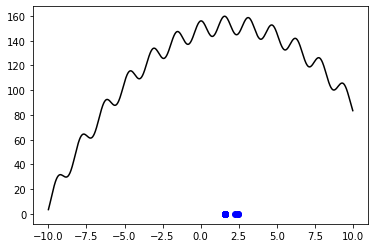

In [11]:
if __name__ == "__main__":

    x = np.linspace(-10, 10, 1000)
    y = np.vectorize(function)(x, 0)

    for i in range(100):

        personal_best_arr = update_personal_best(
            particles_arr, personal_best_arr)
        global_best = update_global_best(personal_best_arr, global_best)
        Vx, Vy = update_velocity(
            Vx, Vy, particles_arr, personal_best_arr, global_best)
        particles_arr = update_cordinated(particles_arr, Vx, Vy)

        particles_arr_x = [x for (x, _) in particles_arr]
        particles_arr_y = [y for (_, y) in particles_arr]

    print("Global best: ", global_best)
    max_val = function(global_best[0], global_best[1])
    print("Max value: ", max_val)
    plt.plot(x, y, color='black')
    plt.plot(particles_arr_x, particles_arr_y, 'bo')

    plt.show()
